# MNIST CNN

### Importing data

In [3]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


### Preprocessing data

In [4]:
(X_train,y_train), (X_test,y_test)=mnist.load_data()

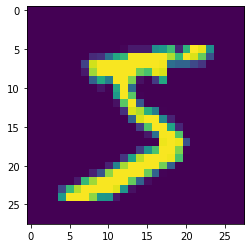

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])


#### Reshape data

In [6]:
pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], pixels).astype('float32')


#### Feature scaling

In [7]:
X_train = X_train/255
X_test = X_test/255



#### One Hot Encoding

In [8]:
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test = enc.fit_transform(y_test[:, np.newaxis]).toarray()

### Build Model

In [11]:
def create_model():
    model = Sequential()
    
    model.add(Dense(pixels, input_dim = pixels, activation = 'relu'))
    
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
        optimizer = 'adam'
    )
    return model


In [12]:
create_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = create_model()

# Fit model
output = model.fit(
    X_train,
    y_train,
    batch_size = 100,
    epochs = 5,
    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test)
print('Loss: ', scores[0])
print('Accuracy', scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.2320 - accuracy: 0.9333 - val_loss: 0.1135 - val_accuracy: 0.9663
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0916 - accuracy: 0.9729 - val_loss: 0.0789 - val_accuracy: 0.9758
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.0696 - val_accuracy: 0.9775
Epoch 4/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.0394 - accuracy: 0.9884 - val_loss: 0.0678 - val_accuracy: 0.9782
Epoch 5/5
10000/10000 [==============================] - 0s 39us/step
Loss:  0.06867415314244572
Accuracy 0.9779999852180481
